In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("./Used_fiat_500_in_Italy_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            380 non-null    object 
 1   engine_power     380 non-null    int64  
 2   transmission     380 non-null    object 
 3   age_in_days      380 non-null    int64  
 4   km               380 non-null    int64  
 5   previous_owners  380 non-null    int64  
 6   lat              380 non-null    float64
 7   lon              380 non-null    float64
 8   price            380 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 26.8+ KB


In [4]:
data.describe() # calcola i principali indici statistici per le colonne numeriche

,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,73.015789,3310.265789,102196.250000,1.510526,44.257712,10.742644,5881.655263
std,9.984672,1437.555063,47115.355234,0.560244,1.767518,2.167753,2170.617946
min,69.000000,91.000000,4981.000000,1.000000,37.510872,7.320720,2890.000000
25%,69.000000,3097.250000,76611.750000,1.000000,43.514196,9.159140,4600.000000
50%,69.000000,3927.000000,112000.000000,1.000000,45.069679,10.301505,5000.000000
75%,69.000000,4322.000000,135000.000000,2.000000,45.556942,12.346788,5500.000000
max,101.000000,4719.000000,259000.000000,4.000000,46.781651,18.168011,15900.000000


# usiamo pandas per fare dei filtri

In [5]:
# tutte le auto con prezzo minore di 3000 euro
data[data["price"]<3000]

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
98,lounge,69,manual,4596,259000,2,45.0271,12.22086,2890


In [6]:
# tutte le auto con prezzo minore di 4000 euro e km<100_000
data[(data["price"]<4000) & (data["km"]<100_000)]  # SELECT * FROM DATA WHERE condizione 

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
103,lounge,69,manual,4383,82000,2,45.467960,9.18178,3500
117,pop,69,automatic,2527,82000,1,41.769051,12.66281,3950
121,lounge,69,manual,4230,93000,1,43.616699,12.81670,3999


In [8]:
# età in giorni di tutte le auto con prezzo minore di 4000 euro e km<100_000
data[(data["price"]<4000) & (data["km"]<100_000)]["age_in_days"]  # SELECT age_in_days FROM DATA WHERE condizione 

103    4383
117    2527
121    4230
Name: age_in_days, dtype: int64

In Pandas abbiamo due oggetti: (sono entrabe classi)
* i `DataFrame` che rappriesentano i dati in forma tabulare(una tabella)
* le `Series` che rappresentano una serie di dati(per esempio una colonna di un `DataFrame`)

In [9]:
# creo una Series con i valore 1,2,3
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

# Visualizzazione di dati
colonne da estrarre: model	engine_power   age_in_days 	km    lat	lon	price

In [10]:
cols=["model", "engine_power", "age_in_days", "km", "lat", "lon", "price"]
selected_data=data[cols]
selected_data

,model,engine_power,age_in_days,km,lat,lon,price
0,pop,69,4474,56779,45.071079,7.46403,4490
1,lounge,69,2708,160000,45.069679,7.70492,4500
2,lounge,69,3470,170000,45.514599,9.28434,4500
3,sport,69,3288,132000,41.903221,12.49565,4700
4,sport,69,3712,124490,45.532661,9.03892,4790
...,...,...,...,...,...,...,...
375,lounge,69,4474,55976,45.610050,9.24234,5500
376,lounge,69,4200,134717,44.102020,9.82024,5500
377,lounge,69,3470,113344,41.003799,16.87294,5500
378,pop,69,3712,130000,45.810501,8.96474,5500


In [11]:
selected_data["model"].unique() #SELECT DISTINCT model FROM selected

array(['pop', 'lounge', 'sport', 'star'], dtype=object)

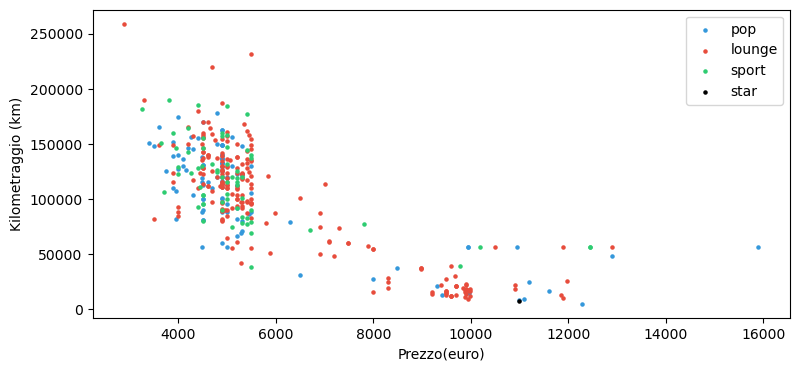

In [58]:
#fare un dizionario di volori: un colore per ogni modello
mod_color = {
    'pop': '#3498db',
    'lounge': '#e74c3c',
    'sport': '#2ecc71',
    'star': '#000000'
}

fig, ax = plt.subplots(figsize=(9,4))
for model in selected_data["model"].unique():
    selected_modello=selected_data[selected_data["model"]==model]
    ax.scatter(selected_modello["price"], selected_modello["km"], s=5, label=model, c=mod_color[model])# grafico a dispersione
ax.set_xlabel("Prezzo(euro)")
ax.set_ylabel("Kilometraggio (km)")
ax.legend()
plt.show()

In [61]:
def scatter_plot(ax, x_name, y_name):
    for model in selected_data["model"].unique():
        selected_modello=selected_data[selected_data["model"]==model]
        ax.scatter(selected_modello[x_name], selected_modello[y_name], s=5, label=model)# grafico a dispersione
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.legend()

def histogram_plot(ax, x_name):
    for model in selected_data["model"].unique():
        selected_modello=selected_data[selected_data["model"]==model]
        ax.hist(selected_modello[x_name], bins=15 , label=model, alpha=0.5)
    ax.set_xlabel(x_name)
    ax.set_ylabel("Frequenza assoluta")
    ax.legend()

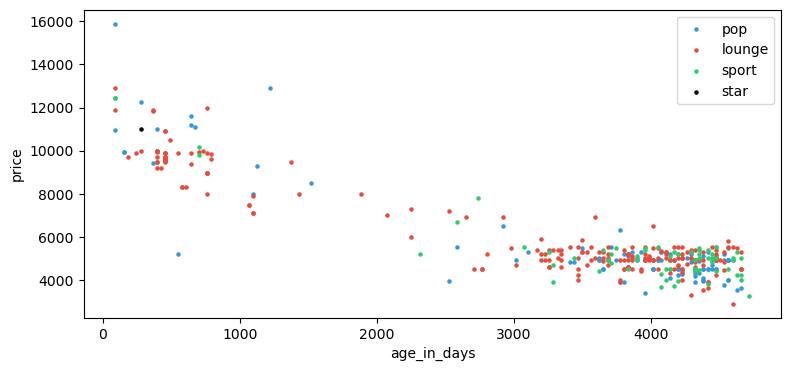

In [48]:
fig, ax = plt.subplots(figsize=(9,4))
scatter_plot(ax, "age_in_days", "price")
plt.show()

### esercizio: analisi grafica del dataset
selezionamo le colonne numeriche. Fare tutti i grafici a dispersione possibili sulle colonne numeriche

In [49]:
cols=["engine_power", "age_in_days", "km", "lat", "lon", "price"]


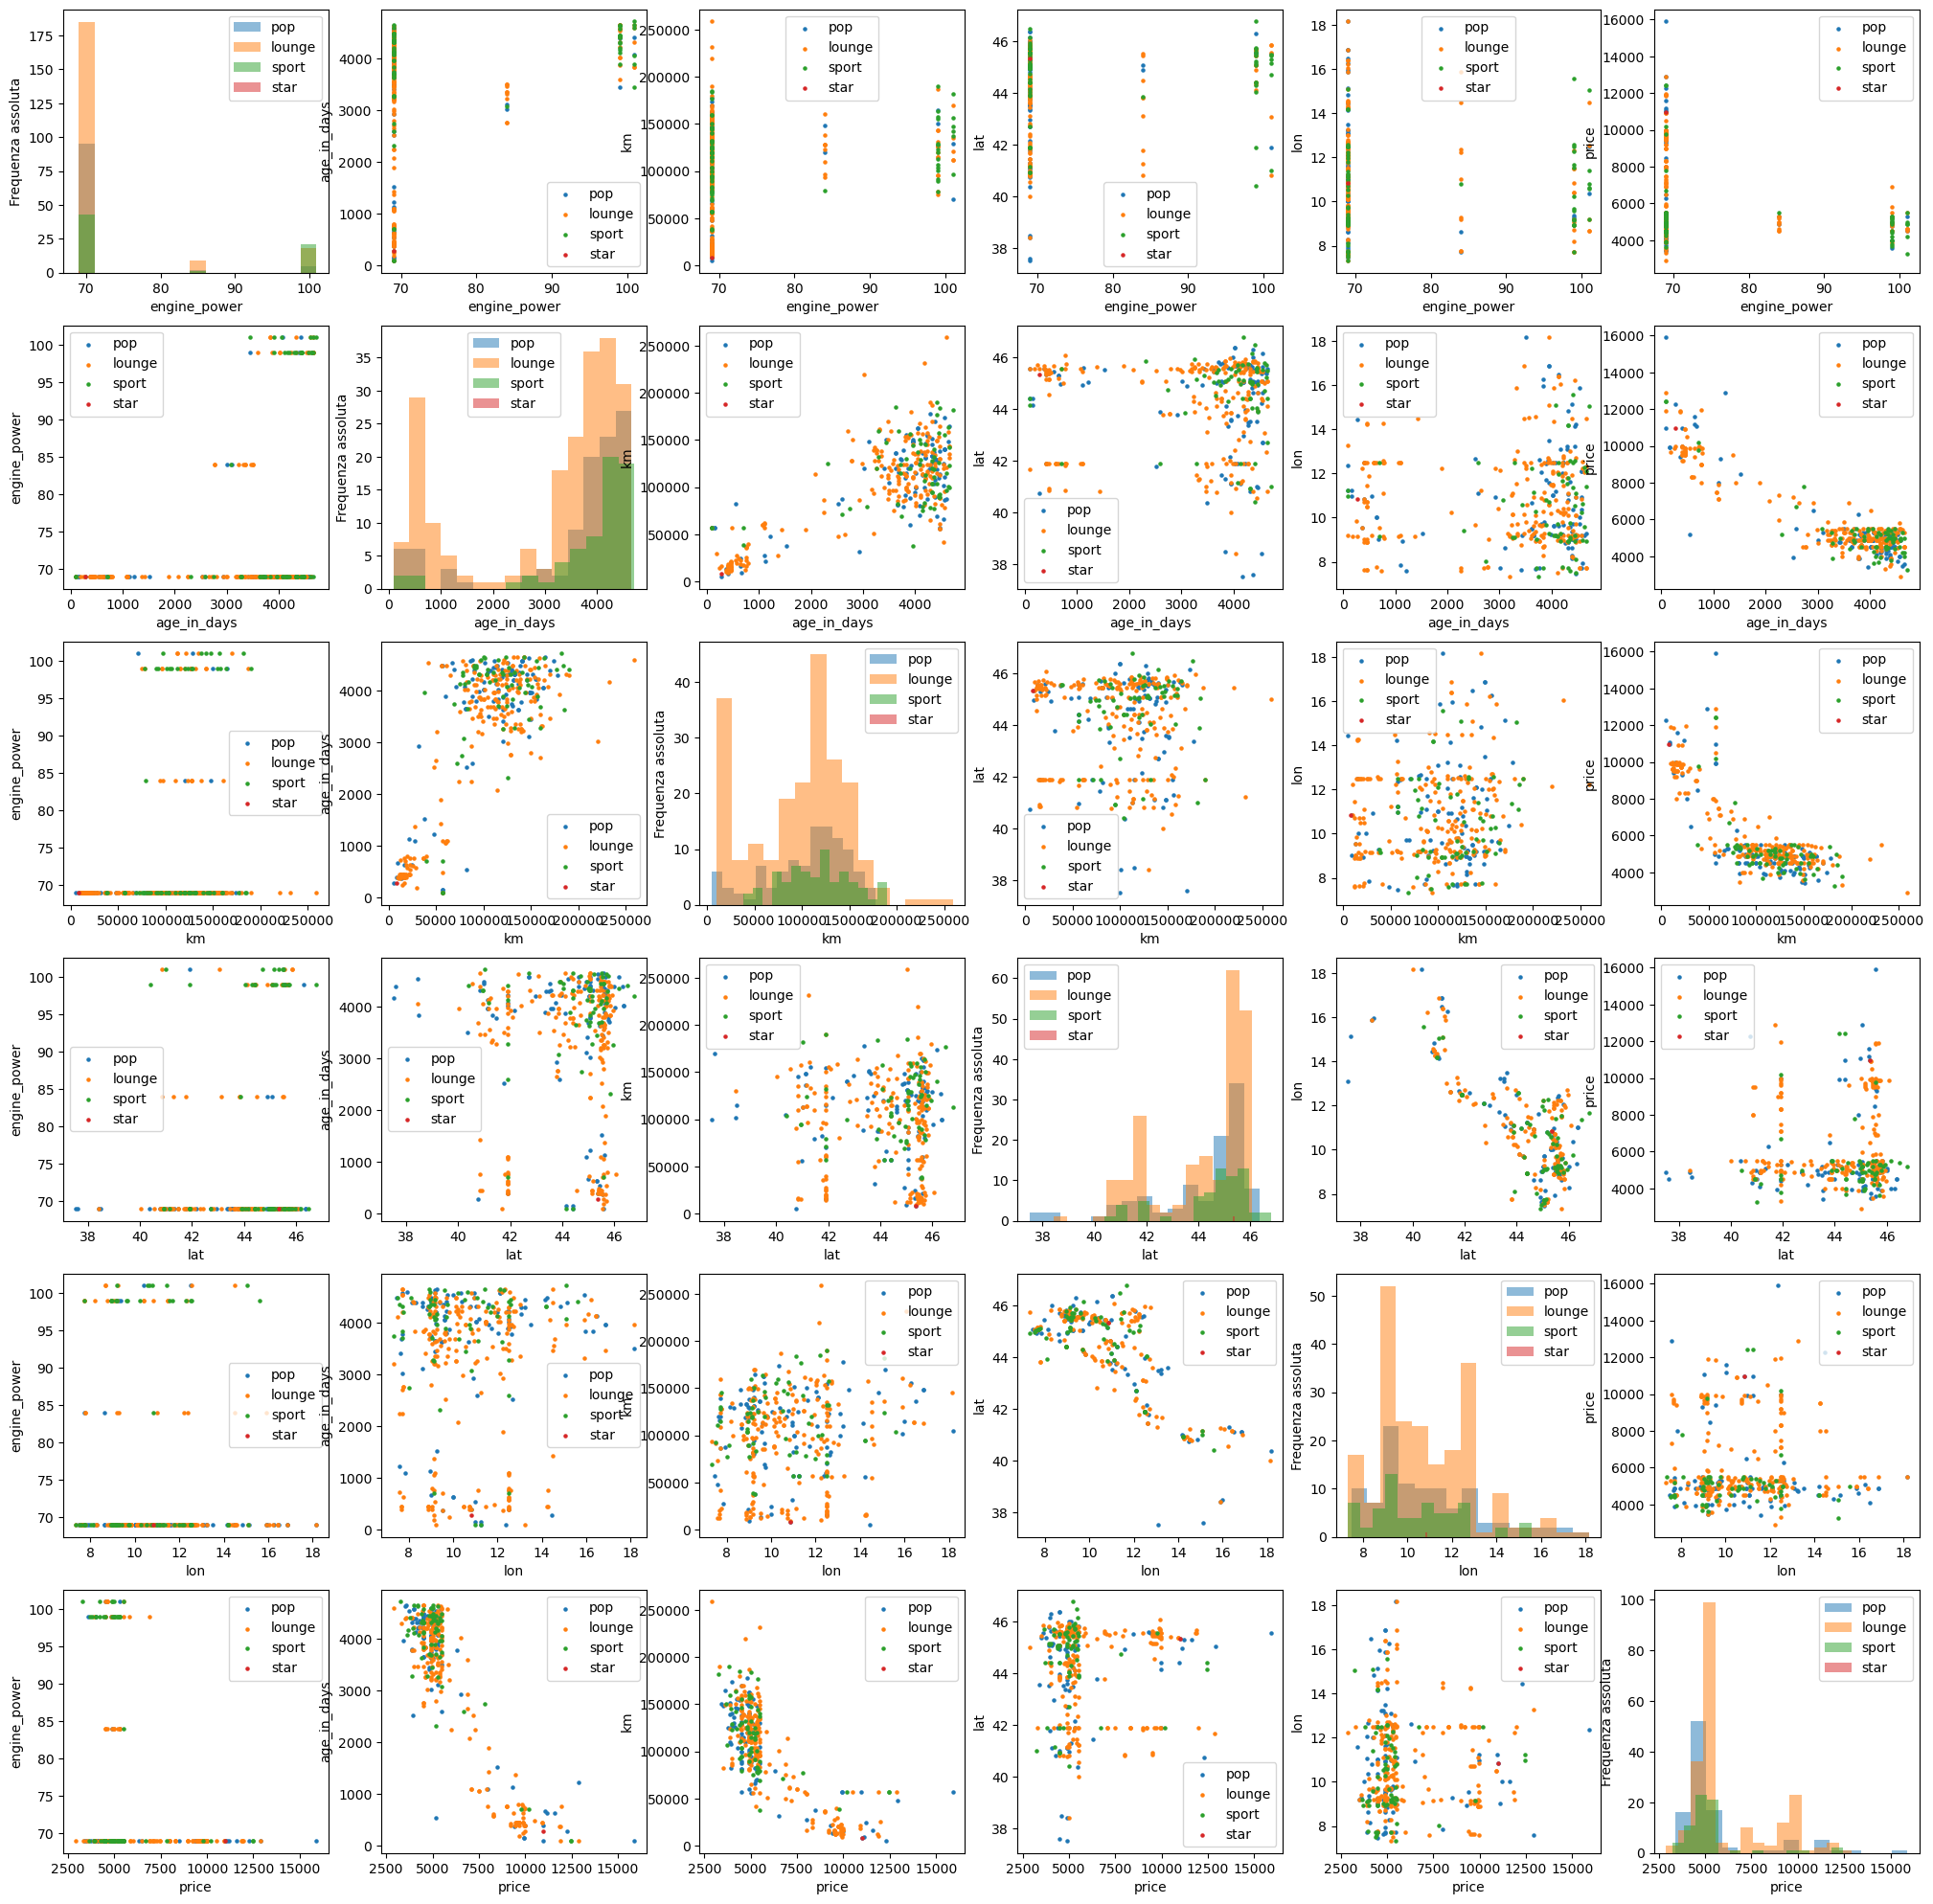

In [62]:
fig, axs = plt.subplots(figsize=(25, 25), nrows=6, ncols=6)
for i, col_1 in enumerate(cols):
    for j, col_2 in enumerate(cols):
        if i!=j:
            scatter_plot(axs[i, j], col_1 , col_2)
        else:
            histogram_plot(axs[i, j], col_1)

plt.savefig('./analisiGrafica.pdf')
plt.show()
